# EDA Task 5

In [1]:
# Import sys so we can import custom packages without error
import sys
sys.path.append('../')

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [2]:
import pandas as pd
import numpy as np

from src.modules.figure_generation import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
flights = pd.read_csv('../data/flights_10000.csv')
flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,orig_weather_categ,dest_weather_categ
0,2018-07-10,WN,WN,WN,2212,WN,N958WN,2212,14683,SAT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,cloudy
1,2019-10-10,UA,UA,UA,206,UA,N68811,206,13930,ORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rain,rain
2,2019-07-18,AA,AA_CODESHARE,AA,4221,MQ,N694AE,4221,12891,LAW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,sunny
3,2018-11-25,UA,UA_CODESHARE,UA,4822,ZW,NaN,4822,14685,SAV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,snow & rain
4,2018-10-24,DL,DL,DL,957,DL,N693DL,957,11433,DTW,...,0.0,28.0,0.0,0.0,NaN,NaN,NaN,NaN,sunny,sunny


In [5]:
flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'orig_weather_categ',
       'dest_weather_categ'],
      dtype='object')

In [6]:
delays = flights[['dep_delay', 'arr_delay', 'orig_weather_categ', 'dest_weather_categ']]

In [7]:
delays.fillna(0, inplace = True)

In [8]:
#create % dept delay col
delays['% dept delay'] = round(delays['dep_delay']/delays['arr_delay']*100)

NOTE: Early departures and arrivals show negative numbers. An early departure and early arrive will result in a positive %.

In [9]:
#fill all nans with 0 - filling all flights that had an arrival delay of 0.
delays.isnull().sum()

dep_delay               0
arr_delay               0
orig_weather_categ      0
dest_weather_categ      0
% dept delay          171
dtype: int64

In [10]:
delays.fillna(0, inplace = True)

In [11]:
#find the difference between scheduled air time and actual air time
delays['air_time_delta'] = flights['crs_elapsed_time']-flights['actual_elapsed_time']      

air_time_delta will show if the plane was slower or faster than expected. If values is negative than the flight was slower, if positive faster.

% over 100 mean the flight did reduce the overall arrival delay.

In [12]:
delays.head(2)

,dep_delay,arr_delay,orig_weather_categ,dest_weather_categ,% dept delay,air_time_delta
0,-3.0,-2.0,cloudy,cloudy,150.0,-1.0
1,-3.0,-9.0,rain,rain,33.0,6.0


In [13]:
delays.isnull().sum()

dep_delay               0
arr_delay               0
orig_weather_categ      0
dest_weather_categ      0
% dept delay            0
air_time_delta        191
dtype: int64

In [13]:
delays.fillna(0, inplace = True)

In [14]:
delay_result = delays[['arr_delay','dep_delay','% dept delay', 'air_time_delta', 'orig_weather_categ', 'dest_weather_categ']].sort_values('% dept delay', ascending = False)

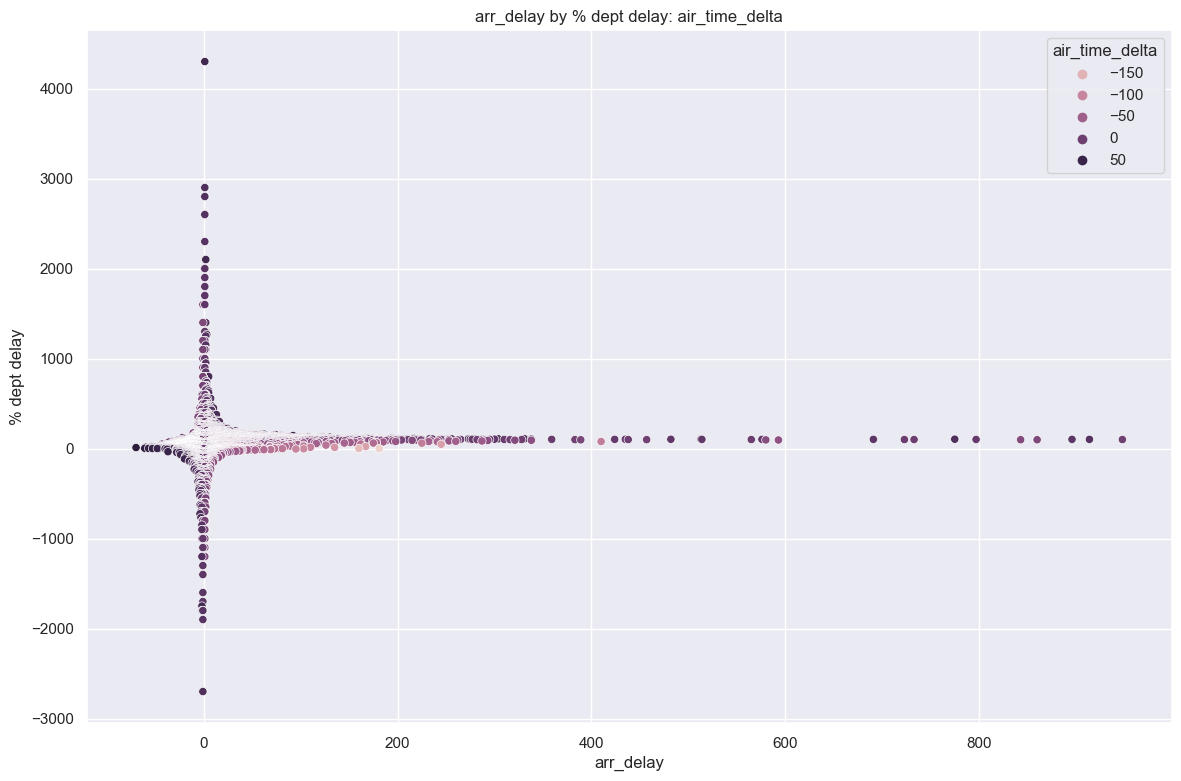

In [15]:
sns.set(rc={'figure.figsize':(14,9)})
scatter_plot(delay_result, xinput='arr_delay', yinput='% dept delay', hinput='air_time_delta')
#sns.scatterplot(data=delay_result, x="arr_delay", y="% dept delay", hue = 'air_time_delta')

In [16]:
delays.describe()

,dep_delay,arr_delay,% dept delay,air_time_delta
count,10000.000000,10000.000000,10000.0,10000.0000
mean,10.480500,5.466500,NaN,4.8944
std,47.226188,49.373696,NaN,13.6816
min,-27.000000,-70.000000,-inf,-184.0000
25%,-6.000000,-15.000000,4.0,-1.0000
50%,-2.000000,-6.000000,36.0,6.0000
75%,6.000000,7.000000,93.0,13.0000
max,947.000000,948.000000,inf,62.0000


In [17]:
delays['% dept delay'].sum()#/len(delays['% dept delay'])

nan

In [18]:
delays.groupby(by = '% dept delay').count()

,dep_delay,arr_delay,orig_weather_categ,dest_weather_categ,air_time_delta
% dept delay,,,,,
-inf,119,119,119,119,119
-2700.0,1,1,1,1,1
-1900.0,1,1,1,1,1
-1800.0,5,5,5,5,5
-1750.0,1,1,1,1,1
...,...,...,...,...,...
2600.0,2,2,2,2,2
2800.0,1,1,1,1,1
2900.0,1,1,1,1,1


In [19]:
delays.replace([np.inf, -np.inf], 0, inplace = True)

In [20]:
delays.describe()

,dep_delay,arr_delay,% dept delay,air_time_delta
count,10000.000000,10000.000000,10000.000000,10000.0000
mean,10.480500,5.466500,46.902600,4.8944
std,47.226188,49.373696,193.172432,13.6816
min,-27.000000,-70.000000,-2700.000000,-184.0000
25%,-6.000000,-15.000000,0.000000,-1.0000
50%,-2.000000,-6.000000,35.000000,6.0000
75%,6.000000,7.000000,90.000000,13.0000
max,947.000000,948.000000,4300.000000,62.0000


The mean % dep delay is 47%. So the departure delay does make up about half of the arrival delay.

Are airlines able to lower the delay during the flights?

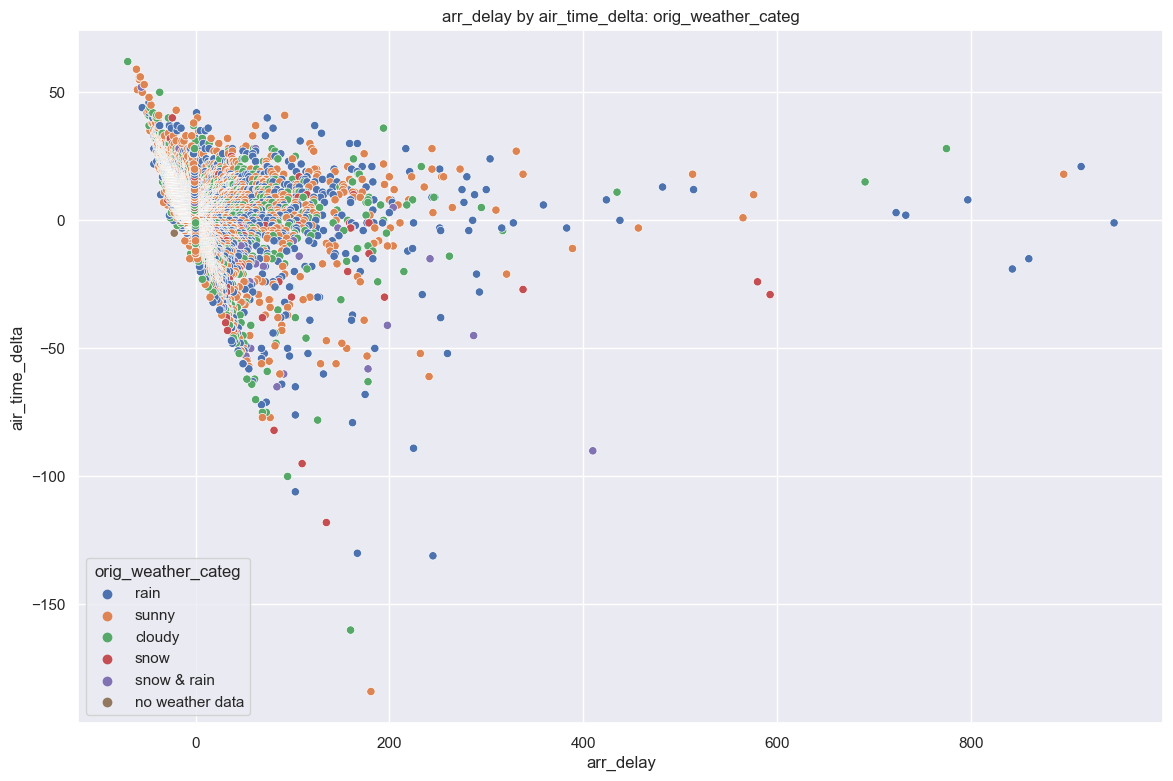

In [22]:
#sns.scatterplot(data=delay_result, x="arr_delay", y="air_time_delta", hue = 'orig_weather_categ')
scatter_plot(delay_result, xinput='arr_delay', yinput='air_time_delta', hinput = 'orig_weather_categ')

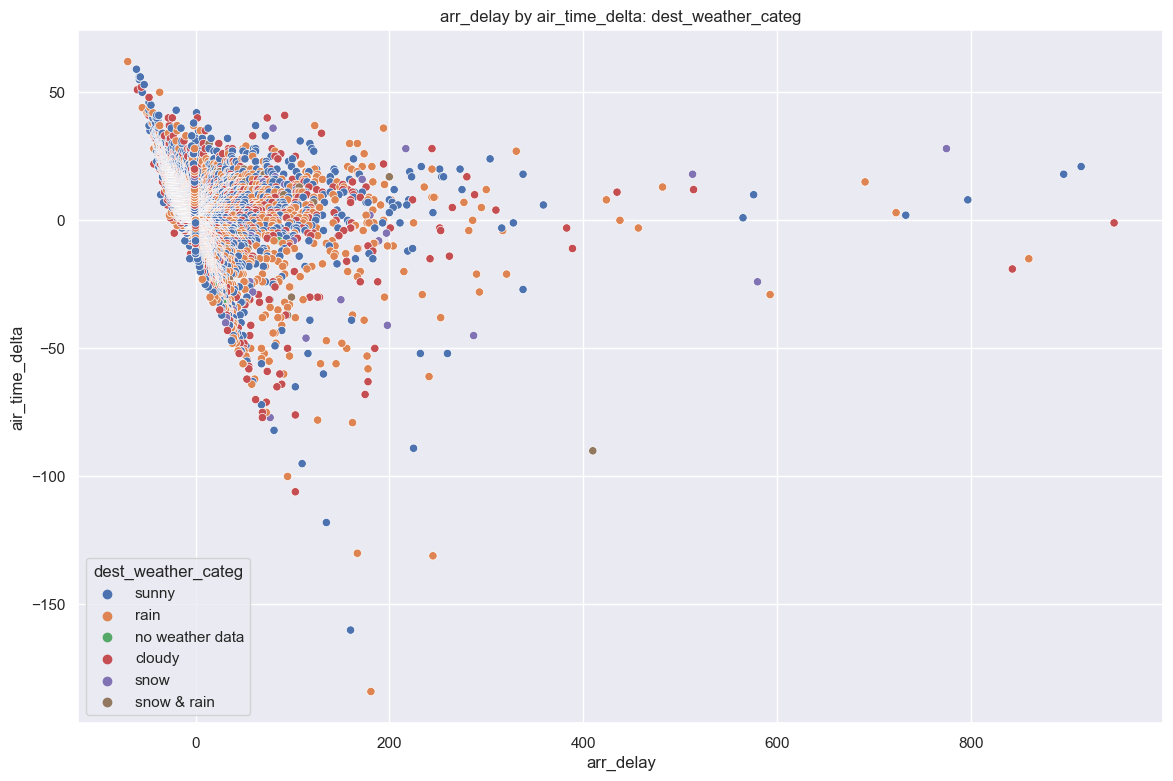

In [23]:
#sns.scatterplot(data=delay_result, x="arr_delay", y="air_time_delta", hue = 'dest_weather_categ')
scatter_plot(delay_result, xinput='arr_delay', yinput='air_time_delta', hinput = 'dest_weather_categ')

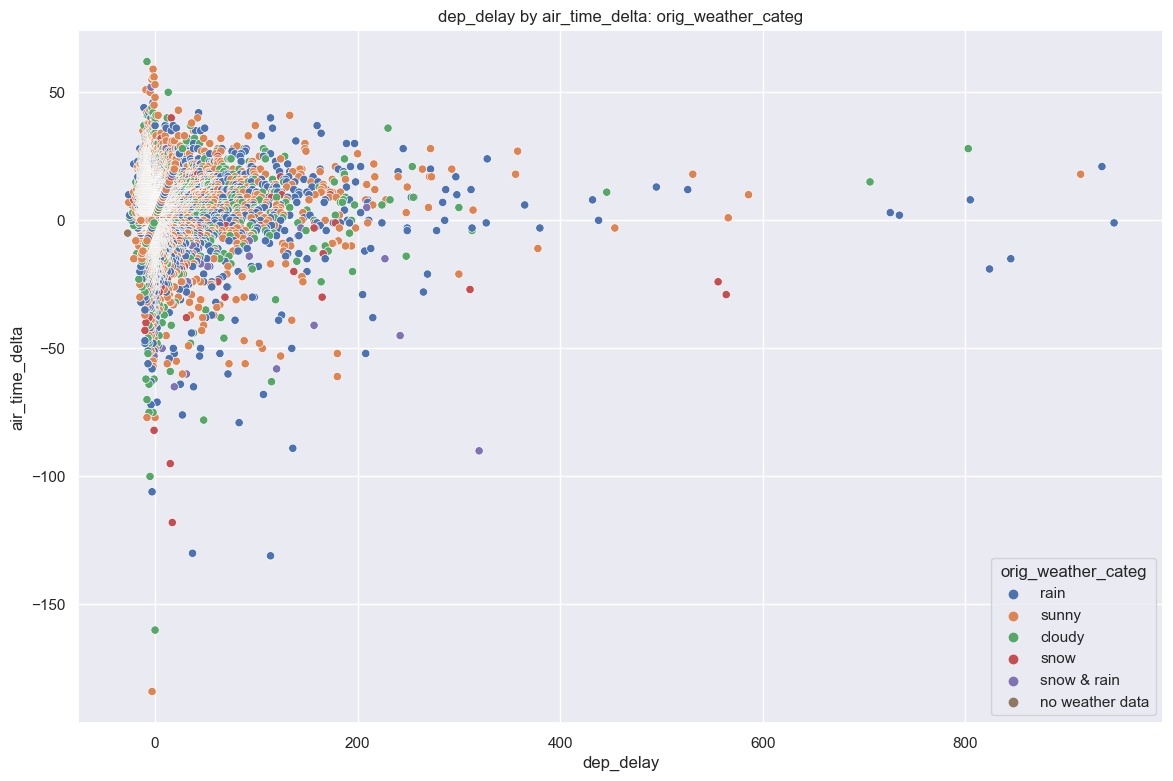

In [25]:
#sns.scatterplot(data=delay_result, x="dep_delay", y="air_time_delta", hue = 'orig_weather_categ')
scatter_plot(delay_result, xinput='dep_delay', yinput='air_time_delta', hinput = 'orig_weather_categ')

In [26]:
#count the number of 100% dept delays
delay_result[['% dept delay', 'dep_delay']].groupby(by = ['% dept delay']).count().sort_values(by = ['dep_delay'], ascending = False).head(3)

,dep_delay
% dept delay,
-0.0,659
100.0,259
50.0,236


In [27]:
delay_result[delay_result['% dept delay'] == 100].describe()

,arr_delay,dep_delay,% dept delay,air_time_delta
count,259.000000,259.000000,259.0,259.000000
mean,22.806950,22.814672,100.0,0.007722
std,104.536377,104.627229,0.0,0.264022
min,-23.000000,-23.000000,100.0,-1.000000
25%,-6.000000,-6.000000,100.0,0.000000
50%,-3.000000,-3.000000,100.0,0.000000
75%,5.500000,5.500000,100.0,0.000000
max,948.000000,947.000000,100.0,3.000000


For departure delays that make up 100% of the arrival delay, the mean air time delta is basically 0. So they are not making up the time in the air for departure delays